<a href="https://colab.research.google.com/github/LunaTic-Neon/2025-2-DLAP/blob/main/25_2_1017_DLAP_7%EC%A3%BC%EC%B0%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 함성곱 신경망

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

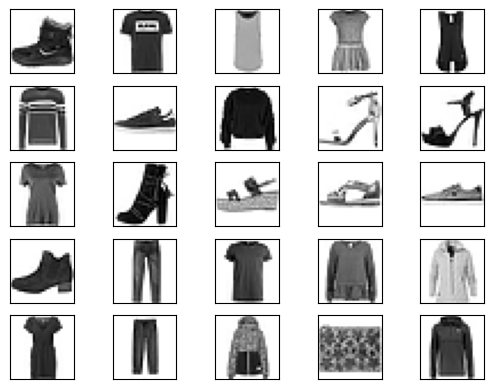

In [3]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7586 - loss: 0.6974
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8518 - loss: 0.4107
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8643 - loss: 0.3707
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8757 - loss: 0.3432
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8790 - loss: 0.3268
313/313 - 1s - 4ms/step - accuracy: 0.8743 - loss: 0.3502


[0.3501676619052887, 0.8743000030517578]

In [5]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

In [14]:
def print_image_summary(image, labels):

  print('--------------')
  print('Image Details:')
  print('--------------')
  print(f'Image dimensions: {image.shape}')
  print('Channels:')

  if len(labels) == 1:
    image = image[..., np.newaxis]

  for i, lab in enumerate(labels):
    min_val = np.min(image[:,:,i])
    max_val = np.max(image[:,:,i])
    print(f'{lab} : min={min_val:.4f}, max={max_val:.4f}')

/tmp/ipython-input-1408593326.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(image_gs, ax=ax)


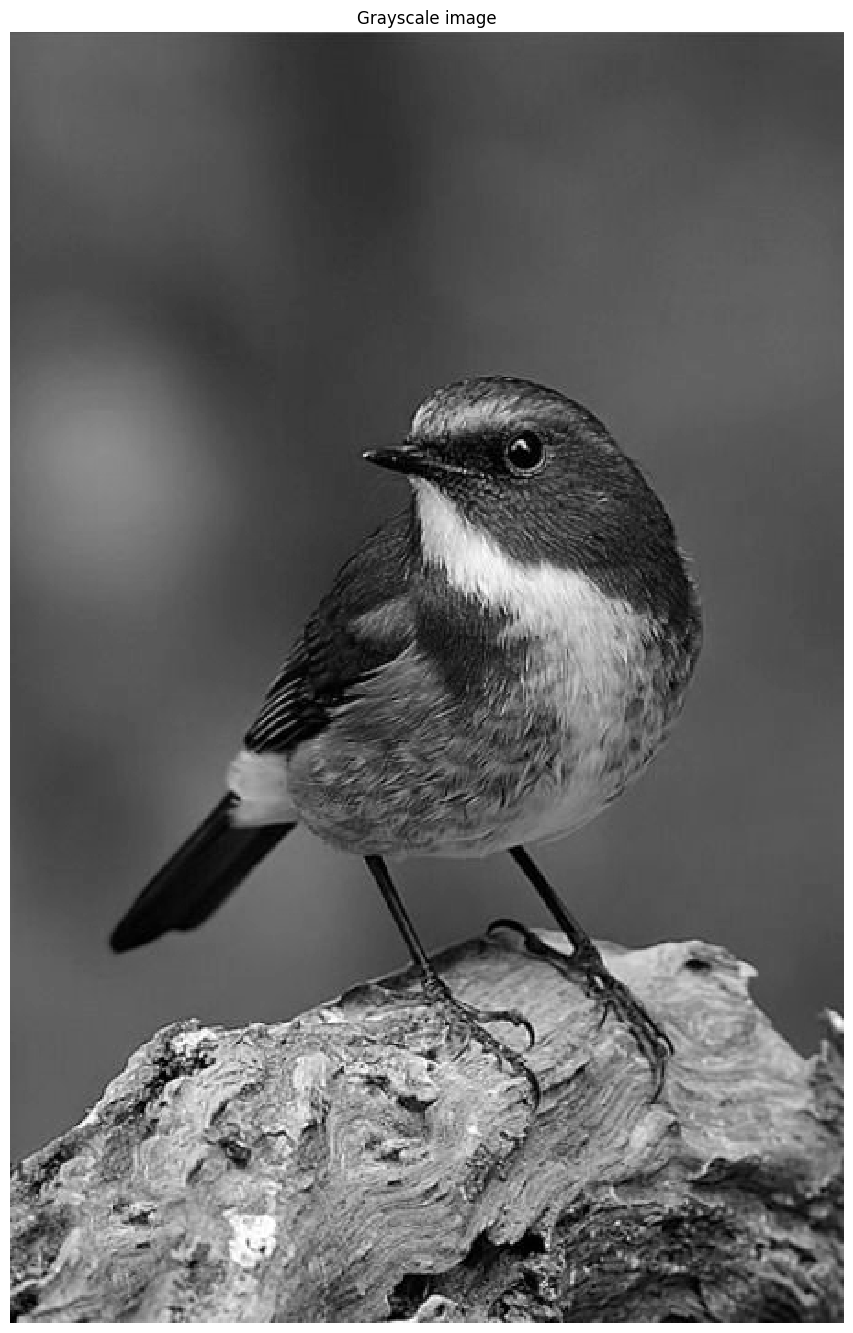

In [19]:
image_gs = imread('sample_data/bird.jpg', as_gray=True)
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_gs, ax=ax)
ax.set_title('Grayscale image')
ax.axis('off');

In [20]:
print_image_summary(image_gs, ['G'])

--------------
Image Details:
--------------
Image dimensions: (703, 454)
Channels:
G : min=0.0000, max=1.0000


In [21]:
X_train_final = x_train.reshape((-1, 28, 28, 1)) / 255.
X_test_final = x_test.reshape((-1, 28, 28, 1)) / 255.

In [22]:
model_with_conv = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu',
                         input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D((2, 2), strides=2),
  tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2), strides=2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model_with_conv.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model_with_conv.fit(X_train_final, y_train, epochs=5)
model_with_conv.evaluate(X_test_final, y_test, verbose=2)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.5290 - loss: 1.2580
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.7853 - loss: 0.5880
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.8084 - loss: 0.5261
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 36ms/step - accuracy: 0.8317 - loss: 0.4730
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.8439 - loss: 0.4358
313/313 - 4s - 14ms/step - accuracy: 0.8438 - loss: 0.4466


[0.44661572575569153, 0.8438000082969666]